# Match Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Cleaning and Exploring

In [2]:
matches = pd.read_csv("matches.csv" , index_col = "id")
matches = matches.iloc[:,:-3]
matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [3]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 1 to 11415
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           756 non-null    int64 
 1   city             749 non-null    object
 2   date             756 non-null    object
 3   team1            756 non-null    object
 4   team2            756 non-null    object
 5   toss_winner      756 non-null    object
 6   toss_decision    756 non-null    object
 7   result           756 non-null    object
 8   dl_applied       756 non-null    int64 
 9   winner           752 non-null    object
 10  win_by_runs      756 non-null    int64 
 11  win_by_wickets   756 non-null    int64 
 12  player_of_match  752 non-null    object
 13  venue            756 non-null    object
dtypes: int64(4), object(10)
memory usage: 88.6+ KB


In [4]:
matches.shape

(756, 14)

In [5]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

### Taking in Consideration only RCB VS KXIP Matches

In [6]:
BP=matches[np.logical_or(np.logical_and(matches['team1']=='Royal Challengers Bangalore',matches['team2']=='Kings XI Punjab'),
                            np.logical_and(matches['team2']=='Royal Challengers Bangalore',matches['team1']=='Kings XI Punjab'))]

In [7]:
BP.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium
42,2017,Bangalore,2017-05-05,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kings XI Punjab,19,0,Sandeep Sharma,M Chinnaswamy Stadium
84,2008,Bangalore,2008-05-05,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,S Sreesanth,M Chinnaswamy Stadium
94,2008,Chandigarh,2008-05-12,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,9,SE Marsh,"Punjab Cricket Association Stadium, Mohali"
127,2009,Durban,2009-04-24,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,7,RS Bopara,Kingsmead


In [8]:
BP.shape

(24, 14)

In [9]:
BP.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [10]:
BP.isnull().sum()

season             0
city               1
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [11]:
BP.describe().iloc[:,2:].T

,count,mean,std,min,25%,50%,75%,max
win_by_runs,24.0,21.458333,39.828959,0.0,0.0,0.0,19.75,138.0
win_by_wickets,24.0,3.875000,3.615336,0.0,0.0,4.5,7.00,10.0


### HEAD TO HEAD

In [12]:
BP.groupby("winner")["winner"].count()

winner
Kings XI Punjab                12
Royal Challengers Bangalore    12
Name: winner, dtype: int64

Text(0.5, 1.0, 'RCB VS KXIP - head to head')

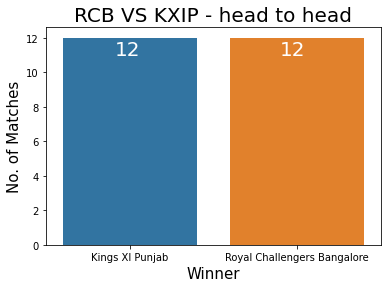

In [13]:
sns.countplot(BP["winner"])
plt.text(-0.09,11,str(BP['winner'].value_counts()['Kings XI Punjab']),size=20,color='white')
plt.text(0.9,11,str(BP['winner'].value_counts()['Royal Challengers Bangalore']),size=20,color='white')
plt.xlabel('Winner',fontsize=15)
plt.ylabel('No. of Matches',fontsize=15)
plt.title('RCB VS KXIP - head to head',fontsize = 20)

In [14]:
Season_wise_Match_Winner = pd.DataFrame(BP.groupby(["season","winner"])["winner"].count())

Season_wise_Match_Winner

winner
season winner                             
2008   Kings XI Punjab                   2
2009   Kings XI Punjab                   1
       Royal Challengers Bangalore       1
2010   Royal Challengers Bangalore       2
2011   Kings XI Punjab                   1
       Royal Challengers Bangalore       1
2012   Kings XI Punjab                   1
       Royal Challengers Bangalore       1
2013   Kings XI Punjab                   2
2014   Kings XI Punjab                   2
2015   Kings XI Punjab                   1
       Royal Challengers Bangalore       1
2016   Royal Challengers Bangalore       2
2017   Kings XI Punjab                   2
2018   Royal Challengers Bangalore       2
2019   Royal Challengers Bangalore       2

### Winning Percentage

In [15]:
Winning_Percentage = BP['winner'].value_counts()/len(BP['winner'])

In [16]:
print(" RR winning percentage against DC(overall) : {}%".format(int(round(Winning_Percentage[0]*100))))
print("DC winning percentage against RR(overall) : {}%".format(int(round(Winning_Percentage[1]*100))))

 RR winning percentage against DC(overall) : 50%
DC winning percentage against RR(overall) : 50%


### Performance Based Analysis

In [17]:
def performance( team_name , given_df ):
    for value in given_df.groupby('winner'):
        if value[0] == team_name:

            total_win_by_runs = sum(list(value[1]['win_by_runs']))
            total_win_by_wickets = sum(list(value[1]['win_by_wickets']))
            
            if 0 in list(value[1]['win_by_runs'].value_counts().index):
                x = value[1]['win_by_runs'].value_counts()[0]
            else:
                x = 0
                
            if 0 in list(value[1]['win_by_wickets'].value_counts().index):
                y = value[1]['win_by_wickets'].value_counts()[0]
            else:
                y = 0
                
            number_of_times_given_team_win_while_defending = (len(value[1]) - x )
            number_of_times_given_team_win_while_chasing = (len(value[1]) - y )
            
            average_runs_by_which_a_given_team_wins_while_defending = total_win_by_runs / number_of_times_given_team_win_while_defending
            average_wickets_by_which_a_given_team_wins_while_chasing = total_win_by_wickets / number_of_times_given_team_win_while_chasing
            
            print('Number of times given team win while defending :' , number_of_times_given_team_win_while_defending ) 
            print('Number of times given team win while chasing   :' , number_of_times_given_team_win_while_chasing )
            print()
            print('Average runs by which a given team wins while defending  : ' ,round(average_runs_by_which_a_given_team_wins_while_defending))
            print('Average wickets by which a given team wins while chasing : ' ,round(average_wickets_by_which_a_given_team_wins_while_chasing))

In [18]:
performance("Kings XI Punjab",BP)

Number of times given team win while defending : 4
Number of times given team win while chasing   : 8

Average runs by which a given team wins while defending  :  46.0
Average wickets by which a given team wins while chasing :  6.0


In [19]:
performance("Royal Challengers Bangalore",BP)

Number of times given team win while defending : 6
Number of times given team win while chasing   : 6

Average runs by which a given team wins while defending  :  55.0
Average wickets by which a given team wins while chasing :  7.0


## Toss Analysis

In [20]:
Toss_Decision_based_Winner = pd.DataFrame(BP.groupby(['toss_winner',"toss_decision","winner"])["winner"].count())

print(" No of times toss winning decision leading to match winning : ")
Toss_Decision_based_Winner

 No of times toss winning decision leading to match winning : 


winner
toss_winner                 toss_decision winner                             
Kings XI Punjab             bat           Kings XI Punjab                   1
                                          Royal Challengers Bangalore       2
                            field         Kings XI Punjab                   5
                                          Royal Challengers Bangalore       5
Royal Challengers Bangalore bat           Kings XI Punjab                   3
                                          Royal Challengers Bangalore       1
                            field         Kings XI Punjab                   3
                                          Royal Challengers Bangalore       4

In [21]:
Toss_Decision = pd.DataFrame(BP.groupby(['toss_winner',"toss_decision"])["toss_decision"].count())

print ("Toss winner decision :")
Toss_Decision

Toss winner decision :


toss_decision
toss_winner                 toss_decision               
Kings XI Punjab             bat                        3
                            field                     10
Royal Challengers Bangalore bat                        4
                            field                      7

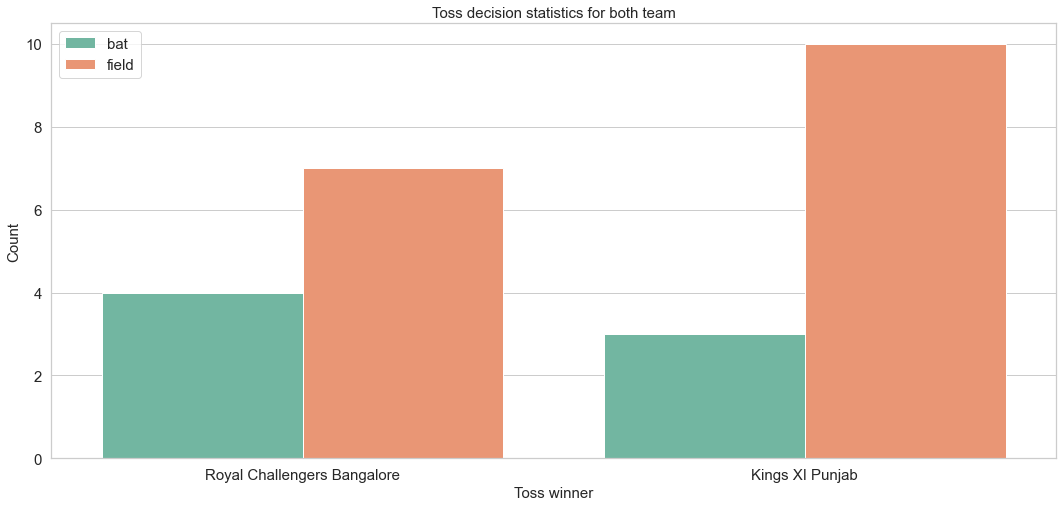

In [22]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,8))
sns.countplot(BP['toss_winner'],palette='Set2',hue=BP['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

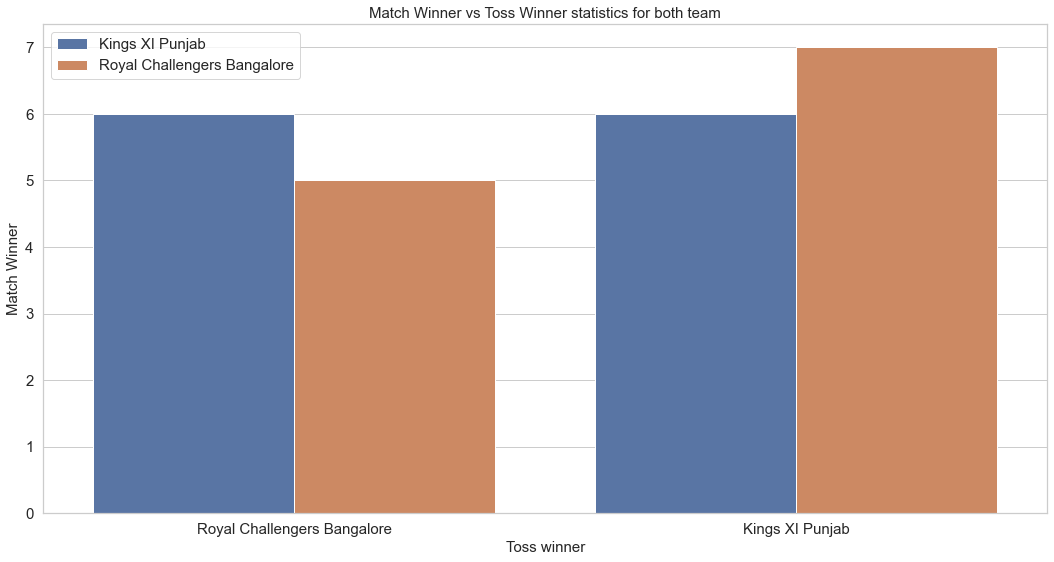

In [23]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(BP['toss_winner'],hue=BP['winner'])
plt.title('Match Winner vs Toss Winner statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

From the above plot we can see a unique coincidence which shows a reverse pattern i.e. when Toss winner is RCB most of the matches are won by KXIP and similarly when toss winner is KXIP most of the matches are won by RCB 

Toss Decision based Analysis of both the teams seperately :

In [24]:
KXIP = BP[BP["toss_winner"]=="Kings XI Punjab"]
RCB = BP[BP["toss_winner"]=="Royal Challengers Bangalore"]

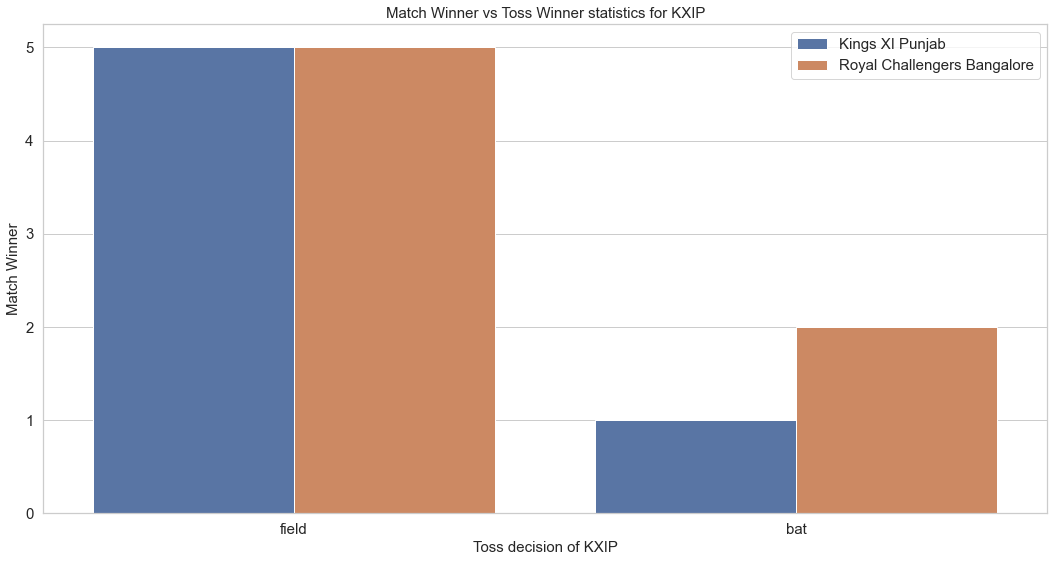

In [25]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(KXIP['toss_decision'],hue=KXIP['winner'])
plt.title('Match Winner vs Toss Winner statistics for KXIP',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of KXIP',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

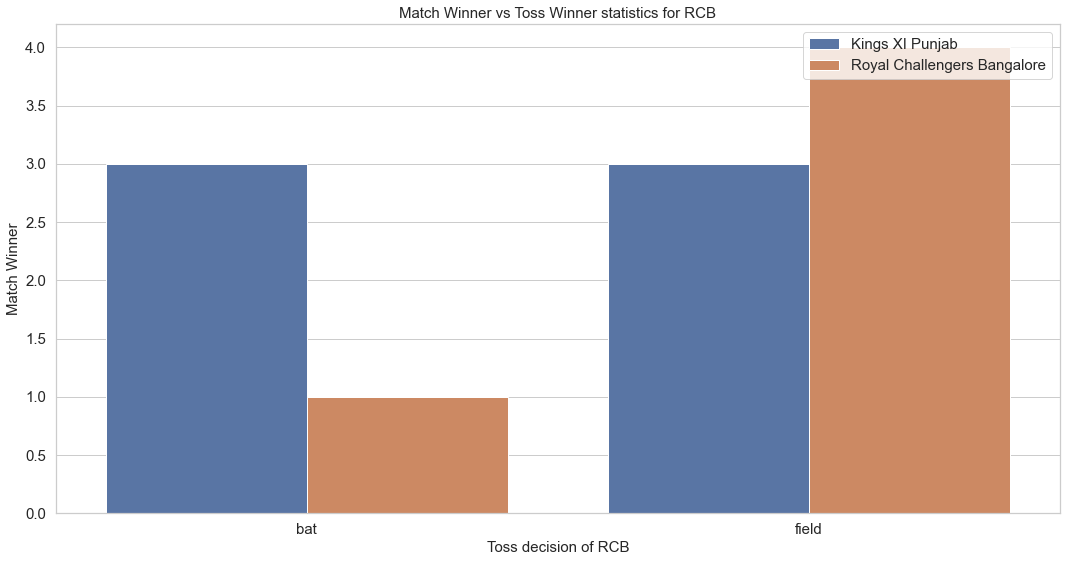

In [26]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(RCB['toss_decision'],hue=RCB['winner'])
plt.title('Match Winner vs Toss Winner statistics for RCB',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of RCB',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

In [27]:
player_of_the_match = pd.DataFrame(BP.player_of_match.value_counts())
player_of_the_match

,player_of_match
CH Gayle,3
Sandeep Sharma,3
UT Yadav,2
AB de Villiers,2
AC Gilchrist,2
AR Patel,2
SE Marsh,1
Yuvraj Singh,1
KP Pietersen,1
RS Bopara,1


### Recent Year Performance Analysis

In [28]:
cond1 = BP["season"] == 2017
cond2 = BP["season"] == 2018
cond3 = BP["season"] == 2019
final = BP[cond1 | cond2 | cond3]
final

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium
42,2017,Bangalore,2017-05-05,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kings XI Punjab,19,0,Sandeep Sharma,M Chinnaswamy Stadium
7901,2018,Bengaluru,13/04/18,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,UT Yadav,M Chinnaswamy Stadium
7941,2018,Indore,14/05/18,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,UT Yadav,Holkar Cricket Stadium
11319,2019,Mohali,13/04/19,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,8,AB de Villiers,IS Bindra Stadium
11333,2019,Bengaluru,24/04/19,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,17,0,AB de Villiers,M. Chinnaswamy Stadium


In [29]:
player = pd.DataFrame(final.player_of_match.value_counts())
player

,player_of_match
UT Yadav,2
AB de Villiers,2
Sandeep Sharma,1
AR Patel,1


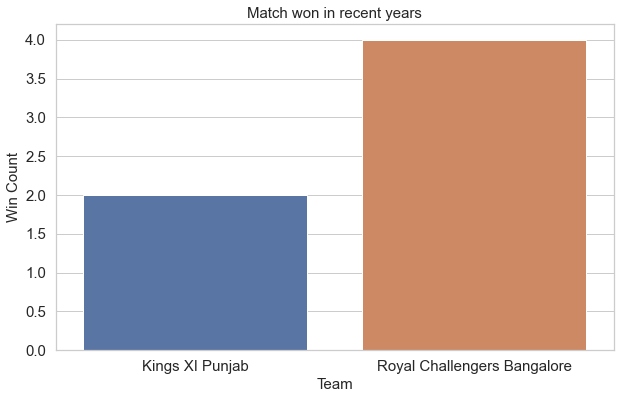

In [30]:
plt.figure(figsize = (10,6))
sns.countplot(final['winner'])
plt.title('Match won in recent years',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Win Count',fontsize=15)
#plt.legend(loc=1,fontsize=15)

plt.show()

Based on the analysis , we see that RCB has a leading edge over KXIP in recent year's matches. But KXIP has also won some good matches against RCB according to win to loss ratio.

Moreover, by analysising both teams toss based decision and their win to loss ratio we also see that both the teams are good while chasing the score i.e. bowling first.

So, based on our analysis related to toss decision , overall match win to loss ratio etc we can say that KXIP has better chances to win the match if they will chase considering their better chase history against RCB 

Similarly, if RCB will chase then they have better chances to win